In [2]:
%matplotlib inline
import main
from matplotlib import pyplot as plt
import os


In [3]:
prof_shp = "c:\\Users\\sgpq58\\Research_Share\\Post Doctoral Research\\chicken_springs\\chicken_springs_profiles.shp"
# tindex = "c:\\Users\\sgpq58\\Research_Share\\Post Doctoral Research\\chicken_springs\\cs_uas_pc_utm_13n.shp"
tindex = "d:\\WyomingWork\\chicken_springs\\chicken_springs_ind_utm13n.shp"
out_las="c:\\Users\\sgpq58\\Research_Share\\Post Doctoral Research\\chicken_springs\\chicken_springs_las\\"
main.iterate_prof_shp(prof_shp, tindex, out_dir=out_las)

0
1
2
3
4
5
6
7
8


In [ ]:
!pdal pipeline "C:\\Users\\sgpq58\\Research_Share\\Post Doctoral Research\\chicken_springs\\north_graben_bound_1.json"
!pdal pipeline "C:\\Users\\sgpq58\\Research_Share\\Post Doctoral Research\\chicken_springs\\south_graben_bound_1.json"

In [4]:
n_prof_1 = "c:\\Users\\sgpq58\\Research_Share\\Post Doctoral Research\\chicken_springs\\north_graben_bound_1.las"
s_prof_1 = "c:\\Users\\sgpq58\\Research_Share\\Post Doctoral Research\\chicken_springs\\south_graben_bound_1.las"


xn, zn = main.condition_las_profile(n_prof_1)
xs, zs = main.condition_las_profile(s_prof_1)

In [5]:
n_scarp = main.Scarp(xn, zn)
s_scarp = main.Scarp(xs, zs)

n_scarp.gen_ss()
n_scarp.gen_1e()

s_scarp.gen_ss()
s_scarp.gen_1e()

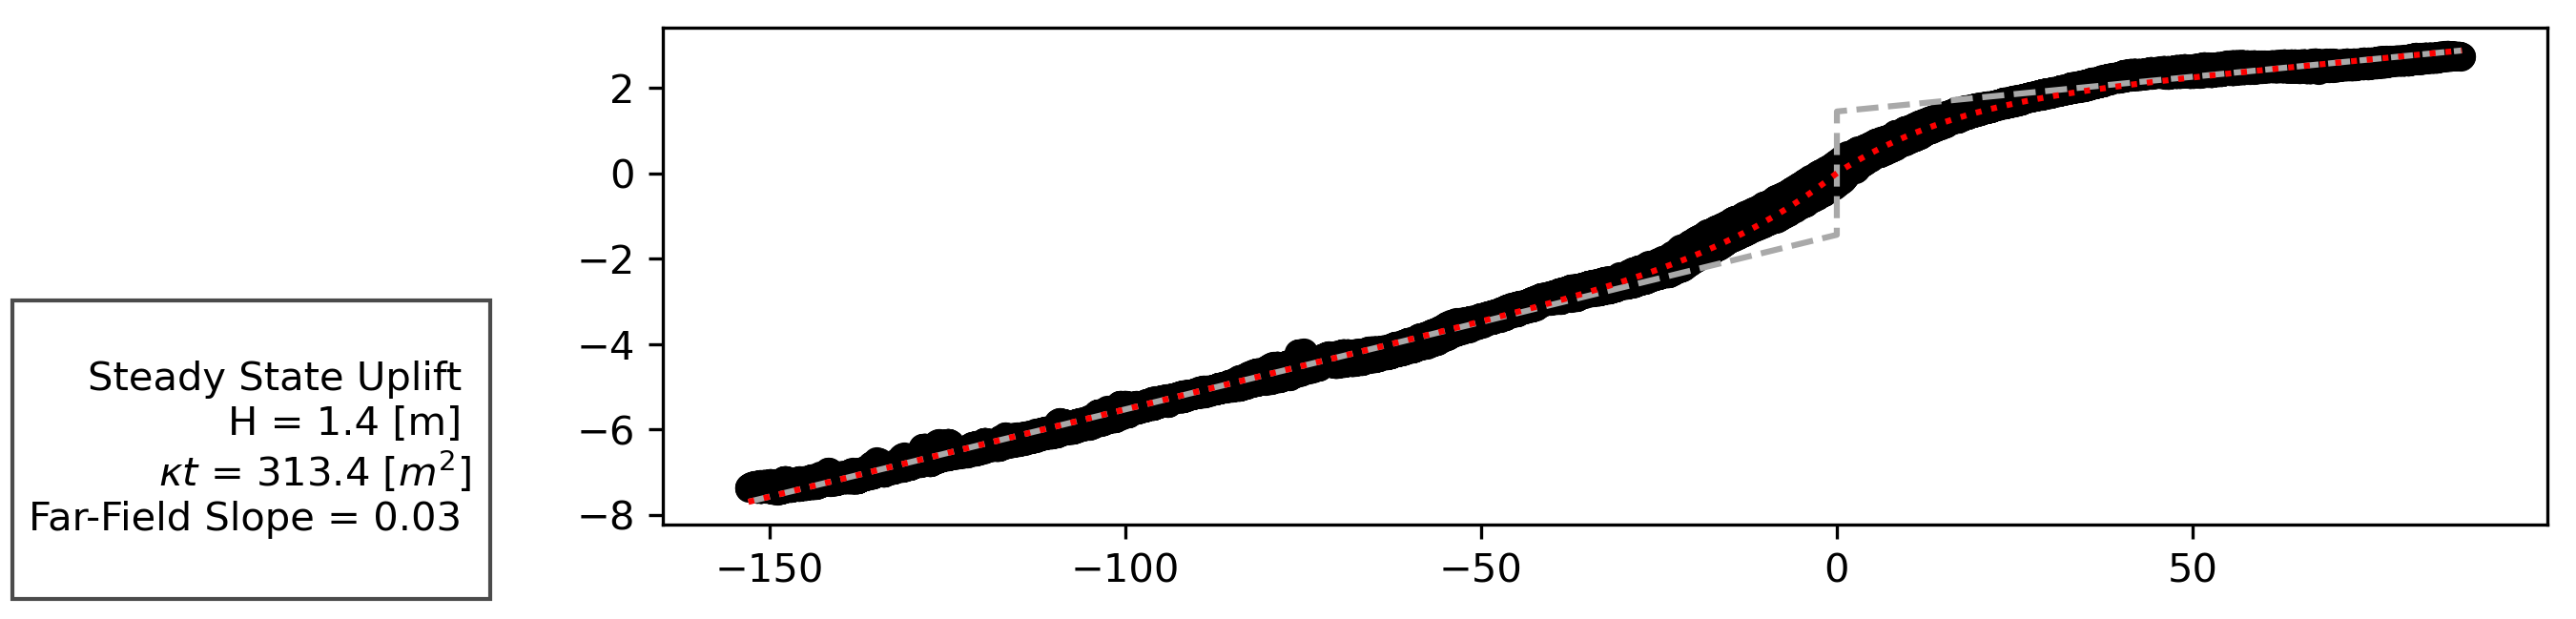

In [6]:
n_scarp.aspect = 6
n_scarp.plot_scarp('ss')
n_scarp.save_scarp_fig("c:/Users/sgpq58/Research_Share/Post Doctoral Research/chicken_springs/north_bound_fault_1_ss.png")

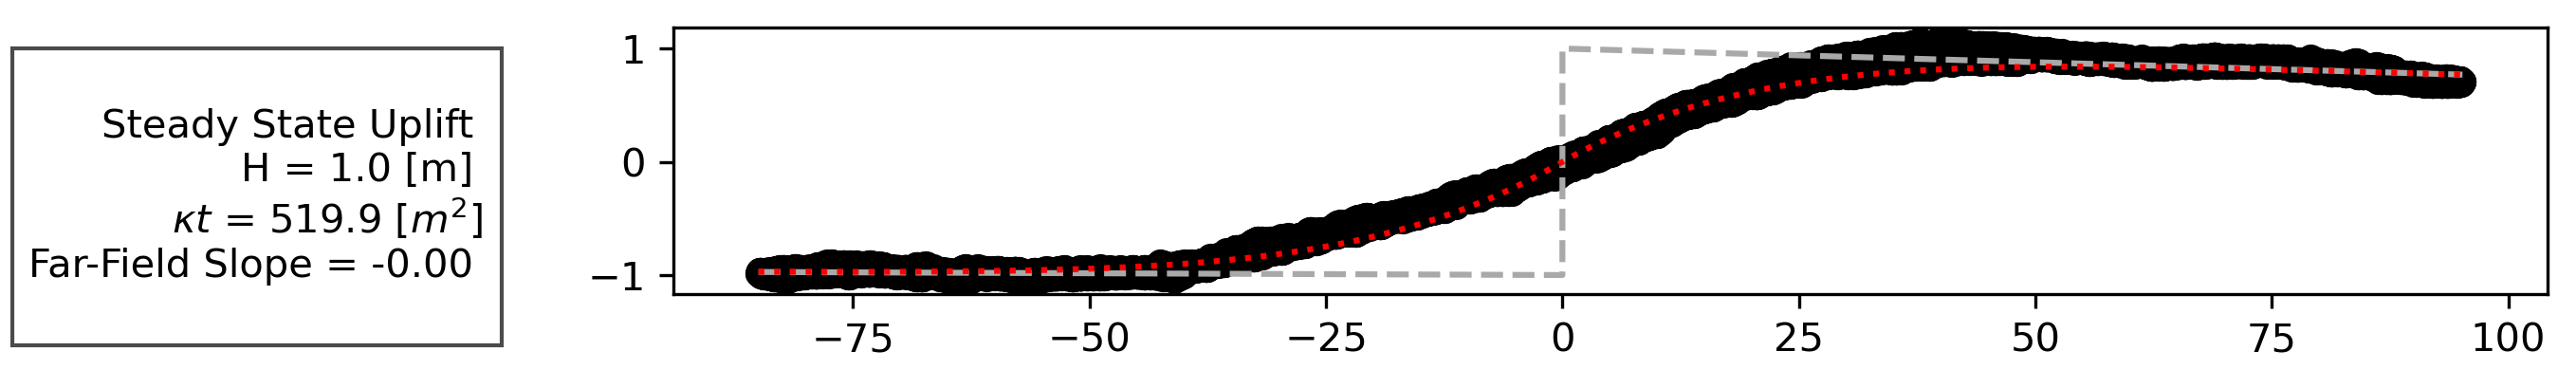

In [7]:
s_scarp.aspect = 12
s_scarp.plot_scarp('ss')
s_scarp.save_scarp_fig("c:/Users/sgpq58/Research_Share/Post Doctoral Research/chicken_springs/south_bound_fault_1_ss.png")

In [7]:
plt.plot(s_scarp.x_lowres, s_scarp.z_lowres, 'o')
plt.show()

In [9]:
las_files = []
las_dir = "c:/Users/sgpq58/Research_Share/Post Doctoral Research/chicken_springs/chicken_springs_las"
for file in os.listdir(las_dir):
    if file.endswith(".las"):
        las_files.append(os.path.join(las_dir, file))

las_names = ["Profile 1", "Profile 2", "Profile 3", "Profile 4", "Profile 5", "Profile 6", "Profile 7", "Profile 8", "Profile 9"]

In [34]:
scarps = []
for i, las in enumerate(las_files):
    x, z = main.condition_las_profile(las)
    filename = os.path.basename(las)
    scarp = main.Scarp(x, z, name=las_names[i])
    scarp.aspect = 3
    scarp.gen_ss()
    scarp.gen_1e()
    scarps.append(scarp)


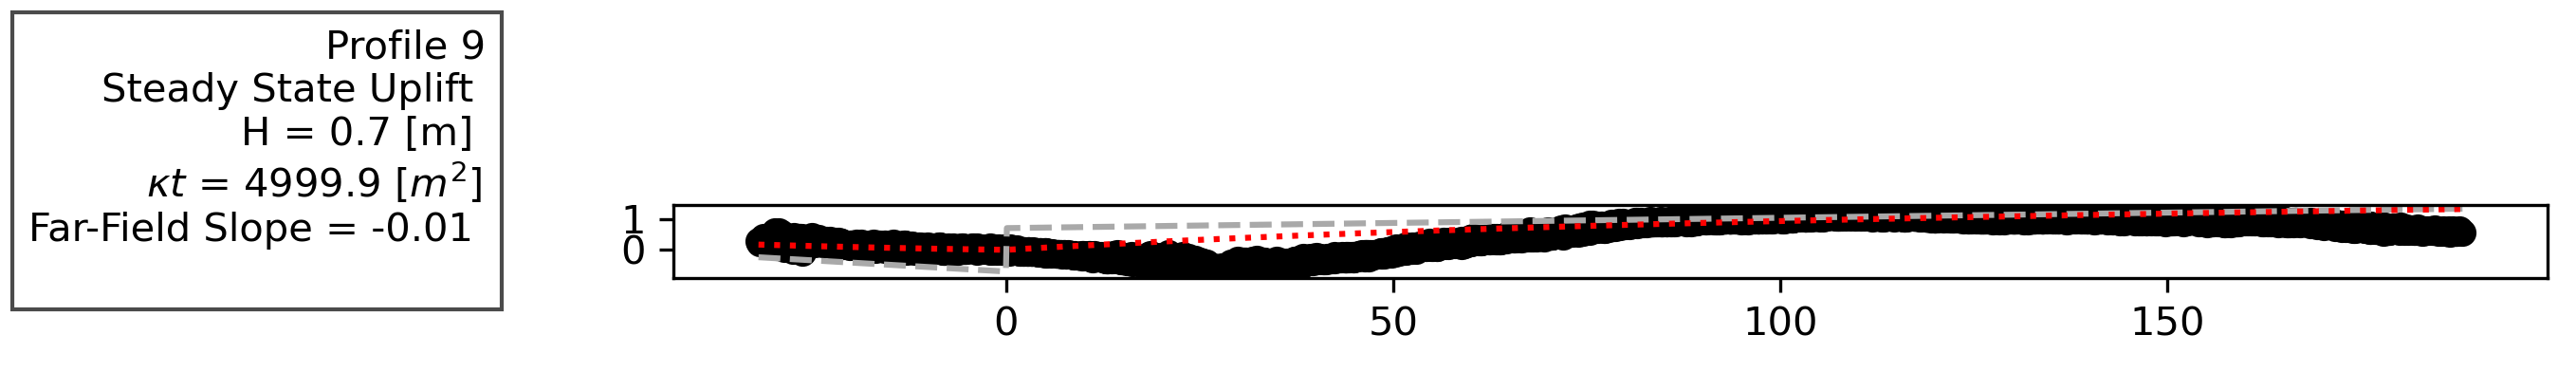

In [54]:
num = 8
plot_type = 'ss'
ext = ".png"
out_root = os.path.dirname(las_files[num])
out_name = las_names[num].replace(" ", "")
out_name = out_name + "_" + plot_type + ext
out_path = os.path.join(out_root, out_name)
scarps[num].aspect=4
scarps[num].plot_scarp('ss')

In [53]:
scarps[num].save_scarp_fig(out_path)
